<a href="https://colab.research.google.com/github/matiasenriqueva/MachineLearning/blob/main/3_fold_CV_Penguin_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CV Penguin dataset
**Objetivos**
* Usar clasificación KNN (k-nearest-neighbors)
* Usar validación cruzada (cross-validation)
* Uso certezas de media

# **Script**
# Preprocesamiento de datos

Importamos todas las librerías a usar

In [128]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score


Montamos un acceso a Google drive, donde estará almacenado el .csv con el dataset

In [129]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


Cargamos el dataset *penguins_size*

In [130]:
dataset=pd.read_csv('/content/drive/MyDrive/CourseML/Datasets/penguins_size.csv')
dataset.head(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


Vemos algunos atributos del dataset

In [131]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [132]:
print(dataset.shape)

(344, 7)


Vemos los datos almacenados dentro del dataset, para verificar si es que existen datos incompletos

In [133]:
dataset.describe(include= 'all')

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
count,344,344,342.000000,342.000000,342.000000,342.000000,334
unique,3,3,NaN,NaN,NaN,NaN,3
top,Adelie,Biscoe,NaN,NaN,NaN,NaN,MALE
freq,152,168,NaN,NaN,NaN,NaN,168
mean,NaN,NaN,43.921930,17.151170,200.915205,4201.754386,NaN
std,NaN,NaN,5.459584,1.974793,14.061714,801.954536,NaN
min,NaN,NaN,32.100000,13.100000,172.000000,2700.000000,NaN
25%,NaN,NaN,39.225000,15.600000,190.000000,3550.000000,NaN
50%,NaN,NaN,44.450000,17.300000,197.000000,4050.000000,NaN
75%,NaN,NaN,48.500000,18.700000,213.000000,4750.000000,NaN


Graficamos los datos de dataset

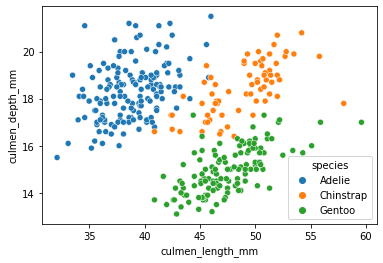

In [134]:
sns.scatterplot(x='culmen_length_mm', y='culmen_depth_mm',data=dataset,hue='species')

Se imputan los datos, con el fin de limpiar el dataset de valores faltantes

In [135]:

imputer = SimpleImputer(strategy='most_frequent') 
dataset.iloc[:,:] = imputer.fit_transform(dataset)

Se verifica si es que ahora existen datos nulos

In [136]:
dataset.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

Limpiamos los datos no discretos del dataset y se transforman a valores numericos, como el sexo o los nombres de las islas

In [137]:
dataset=pd.get_dummies(dataset,columns=['sex','island'])

In [138]:
dataset.head()


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0,0,0,1
3,Adelie,41.1,17.0,190.0,3800.0,0,0,1,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0,0,0,1


Se llenan los posibles valores vacíos con 0

In [139]:
dataset.fillna(0)


,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,Adelie,39.1,18.7,181.0,3750.0,0,0,1,0,0,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0,0,0,1
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0,0,0,1
3,Adelie,41.1,17.0,190.0,3800.0,0,0,1,0,0,1
4,Adelie,36.7,19.3,193.0,3450.0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,Gentoo,41.1,17.0,190.0,3800.0,0,0,1,1,0,0
340,Gentoo,46.8,14.3,215.0,4850.0,0,1,0,1,0,0
341,Gentoo,50.4,15.7,222.0,5750.0,0,0,1,1,0,0
342,Gentoo,45.2,14.8,212.0,5200.0,0,1,0,1,0,0


Ahora escalamos la distribucion de los datos de la tabla

In [140]:
scale=StandardScaler()
scale.fit(dataset.drop(['species'],axis=1))
transformed=scale.transform(dataset.drop(['species'],axis=1))
dataset_scaled=pd.DataFrame(transformed,columns=dataset.columns[1:])

Dataset con los valores redistribuidos

In [141]:
dataset_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,-0.883375,0.788176,-1.415471,-0.562452,-0.053995,-0.960098,0.965704,-0.977008,-0.750757,2.369680
1,-0.809845,0.127001,-1.058960,-0.499877,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
2,-0.662785,0.432159,-0.417242,-1.188208,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
3,-0.515725,-0.076437,-0.773752,-0.499877,-0.053995,-0.960098,0.965704,-0.977008,-0.750757,2.369680
4,-1.324555,1.093334,-0.559846,-0.937906,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
...,...,...,...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,-0.053995,-0.960098,0.965704,1.023533,-0.750757,-0.421998
340,0.532077,-1.449647,1.008800,0.814210,-0.053995,1.041561,-1.035514,1.023533,-0.750757,-0.421998
341,1.193847,-0.737612,1.507915,1.940570,-0.053995,-0.960098,0.965704,1.023533,-0.750757,-0.421998
342,0.237957,-1.195349,0.794894,1.252239,-0.053995,1.041561,-1.035514,1.023533,-0.750757,-0.421998


# Construcción del Modelo KNN

Asignamos la variable dependiente e independiente, aquí la variable dependiente sera la especie que queremos clasificar, mientras que la variable independiente, serán las características que comparten los pinguinos de acuerdo a su clasificación

In [142]:
x_values = dataset_scaled
y_values = dataset['species']


Muestra las características (Independiente)

In [143]:
x_values

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex_.,sex_FEMALE,sex_MALE,island_Biscoe,island_Dream,island_Torgersen
0,-0.883375,0.788176,-1.415471,-0.562452,-0.053995,-0.960098,0.965704,-0.977008,-0.750757,2.369680
1,-0.809845,0.127001,-1.058960,-0.499877,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
2,-0.662785,0.432159,-0.417242,-1.188208,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
3,-0.515725,-0.076437,-0.773752,-0.499877,-0.053995,-0.960098,0.965704,-0.977008,-0.750757,2.369680
4,-1.324555,1.093334,-0.559846,-0.937906,-0.053995,1.041561,-1.035514,-0.977008,-0.750757,2.369680
...,...,...,...,...,...,...,...,...,...,...
339,-0.515725,-0.076437,-0.773752,-0.499877,-0.053995,-0.960098,0.965704,1.023533,-0.750757,-0.421998
340,0.532077,-1.449647,1.008800,0.814210,-0.053995,1.041561,-1.035514,1.023533,-0.750757,-0.421998
341,1.193847,-0.737612,1.507915,1.940570,-0.053995,-0.960098,0.965704,1.023533,-0.750757,-0.421998
342,0.237957,-1.195349,0.794894,1.252239,-0.053995,1.041561,-1.035514,1.023533,-0.750757,-0.421998


Muestra las especies (Dependiente)

In [144]:
y_values

0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

Se dividen los elementos de entrenamiento y de prueba para el algoritmo knn

In [145]:
x_train, x_test, y_train, y_test = train_test_split(x_values, y_values, test_size=0.3, random_state= 7)

Arbitrariamente trabajaremos con un modelo knn, con k=5 y una metrica/medida euclidiana

In [146]:
knn_model = KNeighborsClassifier(n_neighbors=5, p=2, metric='euclidean')

knn_model.fit(x_train, y_train)

KNeighborsClassifier(metric='euclidean')

Hacemos trabajar el modelo con los datos de prueba, para así obtener las clasificaciones que ha hecho knn

In [147]:
out = knn_model.predict(x_test)

Hacemos una matriz de confusión para observar como ha ido la prueba

In [148]:
c_matrix = confusion_matrix(y_test, out)
c_matrix

array([[47,  1,  0],
       [ 0, 18,  0],
       [ 1,  0, 37]])

Graficamos la matriz

(Text(33.0, 0.5, 'True Class'), Text(0.5, 15.0, 'Predicted Class'))

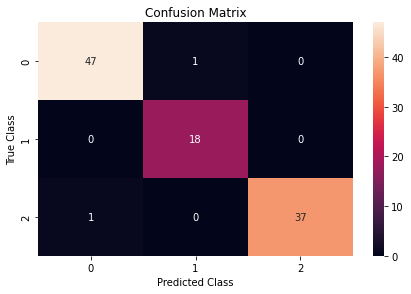

In [149]:
sns.heatmap(c_matrix, annot=True)
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")


Mostramos la capacidad de exactitud del modelo

In [150]:
print("Accuracy: ",str(accuracy_score(y_test, out)))

Accuracy:  0.9807692307692307


# Cross Validation
Usamos validación cruzado 10-fold para probar el modelo

In [151]:
score_fold = cross_val_score(knn_model, X=x_train, y=y_train, cv=10)

# Medidas estadísticas
Una vez obtenido la validación cruzada mostramos sus datos estadisticos como el promedio y la desviación estandar del modelo.

In [152]:
print("Average: ",str(score_fold.mean()))
print("Standard Deviation: ",str(score_fold.std()))

Average:  0.9958333333333333
Standard Deviation:  0.01249999999999999
